In [38]:
#Set working directory

In [56]:
import os
os.chdir("F:/DS/edWisor/Project 1")
os.getcwd()

'F:\\DS\\edWisor\\Project 1'

# Load libraries

In [221]:
import pandas as pd
import matplotlib.pyplot as plt

In [225]:
import numpy as np
import seaborn as sns

In [253]:
from sklearn.model_selection import train_test_split

In [232]:
from random import randrange, uniform
from scipy.stats import chi2_contingency

In [115]:
from fancyimpute import KNN

In [310]:
from ggplot import *

In [43]:
#Load the data

In [78]:
data = pd.read_excel("Absenteeism_at_work_Project.xls")

In [71]:
data.shape

(740, 21)

In [99]:
data.head(10)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36,NaN,7.0,3,1,118.0,13.0,18.0,50.0,239554.0,...,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,239554.0,...,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0
5,3,23.0,7.0,6,1,179.0,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,NaN
6,10,22.0,7.0,6,1,NaN,52.0,3.0,28.0,239554.0,...,0.0,1.0,1.0,1.0,0.0,4.0,80.0,172.0,27.0,8.0
7,20,23.0,7.0,6,1,260.0,50.0,11.0,36.0,239554.0,...,0.0,1.0,4.0,1.0,0.0,0.0,65.0,168.0,23.0,4.0
8,14,19.0,7.0,2,1,155.0,12.0,14.0,34.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,0.0,95.0,196.0,25.0,40.0
9,1,22.0,7.0,2,1,235.0,11.0,14.0,37.0,239554.0,...,0.0,3.0,1.0,0.0,0.0,1.0,88.0,172.0,29.0,8.0


# Data Exploration

C:\Users\sir\Anaconda3\lib\site-packages\ggplot\themes\theme.py:134: RuntimeWarning: text is an invalid theme parameter
  warnings.warn(msg, RuntimeWarning)


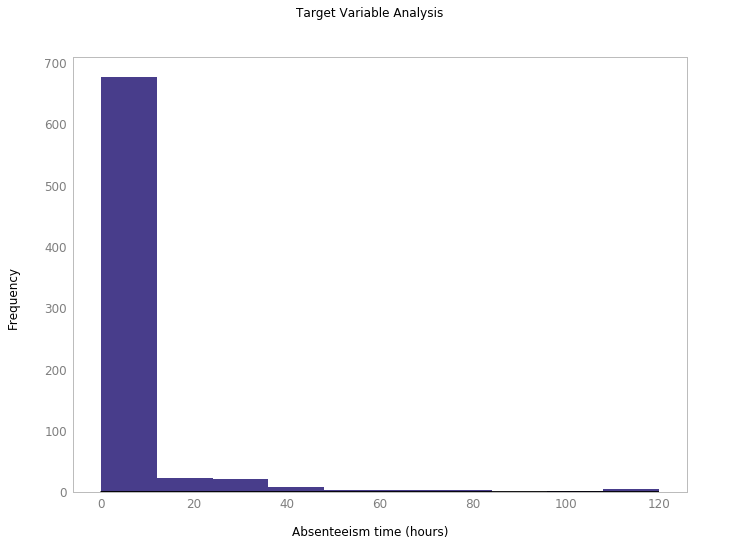

<ggplot: (117038099958)>

In [311]:
#Histogram for Target Variable
ggplot(data, aes(x = 'Absenteeism time in hours')) + geom_histogram(fill="DarkSlateBlue", colour = "black") +\
    geom_density() +\
    theme_bw() + xlab("Absenteeism time (hours)") + ylab("Frequency") + ggtitle("Target Variable Analysis") +\
    theme(text=element_text(size=20))

In [83]:
#fixing data anomalies
data['Reason for absence'] = data['Reason for absence'].replace(0.0,np.nan)
data['Month of absence'] = data['Month of absence'].replace(0.0,np.nan)

# Missing Value Analysis

In [86]:
#create dataframe with missing percentage
missing_val=pd.DataFrame(data.isnull().sum())
missing_val=missing_val.reset_index()
missing_val=missing_val.rename(columns={'index':'variables',0: 'Missing %'})
missing_val['Missing %']=(missing_val['Missing %']/len(data))*100
missing_val=missing_val.sort_values('Missing %',ascending=False).reset_index(drop=True)
missing_val.to_csv('Missing_%.csv',index=False)

In [87]:
missing_val

,variables,Missing %
0,Reason for absence,6.216216
1,Body mass index,4.189189
2,Absenteeism time in hours,2.972973
3,Height,1.891892
4,Work load Average/day,1.351351
5,Education,1.351351
6,Transportation expense,0.945946
7,Son,0.810811
8,Disciplinary failure,0.810811
9,Hit target,0.810811


In [95]:
#imputation method
data['Height'].loc[129]
#Actual value = 171
#create missing value
data['Height'].loc[129]=np.nan

C:\Users\sir\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [97]:
#impute with mean
data['Height'] = data['Height'].fillna(data['Height'].mean())
data['Height'].loc[129]
#mean value = 172.154

172.1544827586207

In [201]:
#reload data
data = pd.read_excel("Absenteeism_at_work_Project.xls")
data['Reason for absence'] = data['Reason for absence'].replace(0.0,np.nan)
data['Month of absence'] = data['Month of absence'].replace(0.0,np.nan)

In [202]:
#impute with median
data['Height'].loc[129]=np.nan
data['Height'] = data['Height'].fillna(data['Height'].median())
data['Height'].loc[129]
#median value = 170.0

C:\Users\sir\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


170.0

In [210]:
#reload data
data = pd.read_excel("Absenteeism_at_work_Project.xls")
data['Reason for absence'] = data['Reason for absence'].replace(0.0,np.nan)
data['Month of absence'] = data['Month of absence'].replace(0.0,np.nan)

In [211]:
#impute with KNN
#since we have all data in numeric, we can apply KNN.
data.dtypes
data['Height'].loc[129]=np.nan
data = pd.DataFrame(KNN(21).fit_transform(data),columns=data.columns)
#KNN value = 170.73 , closest to 171. so we freeze this method.

Imputing row 1/740 with 0 missing, elapsed time: 0.167
Imputing row 101/740 with 1 missing, elapsed time: 0.169
Imputing row 201/740 with 0 missing, elapsed time: 0.170
Imputing row 301/740 with 1 missing, elapsed time: 0.172
Imputing row 401/740 with 1 missing, elapsed time: 0.173
Imputing row 501/740 with 0 missing, elapsed time: 0.174
Imputing row 601/740 with 0 missing, elapsed time: 0.175
Imputing row 701/740 with 0 missing, elapsed time: 0.176


C:\Users\sir\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [212]:
#to verify
pd.DataFrame(data.isnull().sum())

,0
ID,0
Reason for absence,0
Month of absence,0
Day of the week,0
Seasons,0
Transportation expense,0
Distance from Residence to Work,0
Service time,0
Age,0
Work load Average day,0


# Outlier Analysis

{'whiskers': [<matplotlib.lines.Line2D at 0x1b4008f40f0>,
 'caps': [<matplotlib.lines.Line2D at 0x1b4008f49b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b4008eaf60>],
 'medians': [<matplotlib.lines.Line2D at 0x1b4008fc240>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b4008fc668>],
 'means': []}

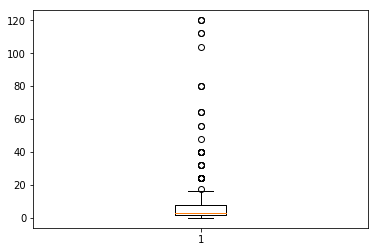

In [315]:
#Plot boxplot to visualize Outliers
%matplotlib inline  
plt.boxplot(data['Absenteeism time in hours'])

In [213]:
#save numeric names
cnames = ["Transportation expense", "Distance from Residence to Work", "Service time", "Age", "Work load Average day", "Hit target","Son", "Pet", "Weight", "Height", "Body mass index"]

In [214]:
#Detect and delete outliers from data
for i in cnames:
     print(i)
     q75, q25 = np.percentile(data.loc[:,i], [75 ,25])
     iqr = q75 - q25

     min = q25 - (iqr*1.5)
     max = q75 + (iqr*1.5)
     print(min)
     print(max)
        
     #Replace with NA
     data.loc[data[i] < min,:i] = np.nan
     data.loc[data[i] > max,:i] = np.nan

     #Calculate missing value
     pd.DataFrame(data.isnull().sum())

     #Impute with KNN
     data = pd.DataFrame(KNN(21).fit_transform(data), columns = data.columns)
     

Transportation expense
57.5
381.5
Imputing row 1/740 with 0 missing, elapsed time: 0.169
Imputing row 101/740 with 0 missing, elapsed time: 0.169
Imputing row 201/740 with 0 missing, elapsed time: 0.171
Imputing row 301/740 with 0 missing, elapsed time: 0.171
Imputing row 401/740 with 0 missing, elapsed time: 0.172
Imputing row 501/740 with 0 missing, elapsed time: 0.172
Imputing row 601/740 with 0 missing, elapsed time: 0.172
Imputing row 701/740 with 0 missing, elapsed time: 0.172
Distance from Residence to Work
-35.0
101.0
Imputing row 1/740 with 0 missing, elapsed time: 0.155
Imputing row 101/740 with 0 missing, elapsed time: 0.156
Imputing row 201/740 with 0 missing, elapsed time: 0.156
Imputing row 301/740 with 0 missing, elapsed time: 0.156
Imputing row 401/740 with 0 missing, elapsed time: 0.157
Imputing row 501/740 with 0 missing, elapsed time: 0.157
Imputing row 601/740 with 0 missing, elapsed time: 0.157
Imputing row 701/740 with 0 missing, elapsed time: 0.157
Service time
-

C:\Users\sir\Anaconda3\lib\site-packages\fancyimpute\solver.py:58: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")


Imputing row 1/740 with 0 missing, elapsed time: 0.161
Imputing row 101/740 with 0 missing, elapsed time: 0.162
Imputing row 201/740 with 0 missing, elapsed time: 0.162
Imputing row 301/740 with 0 missing, elapsed time: 0.163
Imputing row 401/740 with 0 missing, elapsed time: 0.163
Imputing row 501/740 with 0 missing, elapsed time: 0.163
Imputing row 601/740 with 0 missing, elapsed time: 0.166
Imputing row 701/740 with 0 missing, elapsed time: 0.166
Age
17.5
53.5
Imputing row 1/740 with 0 missing, elapsed time: 0.154
Imputing row 101/740 with 0 missing, elapsed time: 0.155
Imputing row 201/740 with 0 missing, elapsed time: 0.155
Imputing row 301/740 with 0 missing, elapsed time: 0.156
Imputing row 401/740 with 0 missing, elapsed time: 0.156
Imputing row 501/740 with 0 missing, elapsed time: 0.158
Imputing row 601/740 with 0 missing, elapsed time: 0.159
Imputing row 701/740 with 0 missing, elapsed time: 0.160
Work load Average day
183688.0
345552.0
Imputing row 1/740 with 0 missing, ela

C:\Users\sir\Anaconda3\lib\site-packages\fancyimpute\solver.py:58: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")


Imputing row 1/740 with 0 missing, elapsed time: 0.170
Imputing row 101/740 with 0 missing, elapsed time: 0.173
Imputing row 201/740 with 17 missing, elapsed time: 0.174
Imputing row 301/740 with 0 missing, elapsed time: 0.178
Imputing row 401/740 with 0 missing, elapsed time: 0.180
Imputing row 501/740 with 0 missing, elapsed time: 0.181
Imputing row 601/740 with 0 missing, elapsed time: 0.184
Imputing row 701/740 with 0 missing, elapsed time: 0.186
Weight
39.0
119.0
Imputing row 1/740 with 0 missing, elapsed time: 0.153
Imputing row 101/740 with 0 missing, elapsed time: 0.153
Imputing row 201/740 with 0 missing, elapsed time: 0.153
Imputing row 301/740 with 0 missing, elapsed time: 0.154
Imputing row 401/740 with 0 missing, elapsed time: 0.154
Imputing row 501/740 with 0 missing, elapsed time: 0.154
Imputing row 601/740 with 0 missing, elapsed time: 0.155
Imputing row 701/740 with 0 missing, elapsed time: 0.155


C:\Users\sir\Anaconda3\lib\site-packages\fancyimpute\solver.py:58: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")


Height
164.5
176.5
Imputing row 1/740 with 0 missing, elapsed time: 0.182
Imputing row 101/740 with 19 missing, elapsed time: 0.188
Imputing row 201/740 with 0 missing, elapsed time: 0.199
Imputing row 301/740 with 0 missing, elapsed time: 0.208
Imputing row 401/740 with 0 missing, elapsed time: 0.214
Imputing row 501/740 with 0 missing, elapsed time: 0.221
Imputing row 601/740 with 0 missing, elapsed time: 0.225
Imputing row 701/740 with 0 missing, elapsed time: 0.233
Body mass index
13.5
41.5
Imputing row 1/740 with 0 missing, elapsed time: 0.159
Imputing row 101/740 with 0 missing, elapsed time: 0.160
Imputing row 201/740 with 0 missing, elapsed time: 0.160
Imputing row 301/740 with 0 missing, elapsed time: 0.160
Imputing row 401/740 with 0 missing, elapsed time: 0.160
Imputing row 501/740 with 0 missing, elapsed time: 0.161
Imputing row 601/740 with 0 missing, elapsed time: 0.161
Imputing row 701/740 with 0 missing, elapsed time: 0.162


C:\Users\sir\Anaconda3\lib\site-packages\fancyimpute\solver.py:58: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")


# Feature Selection

C:\Users\sir\Anaconda3\lib\site-packages\seaborn\palettes.py:727: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  pal = _ColorPalette(pal(np.linspace(0, 1, n_colors)))
C:\Users\sir\Anaconda3\lib\site-packages\seaborn\palettes.py:727: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  pal = _ColorPalette(pal(np.linspace(0, 1, n_colors)))


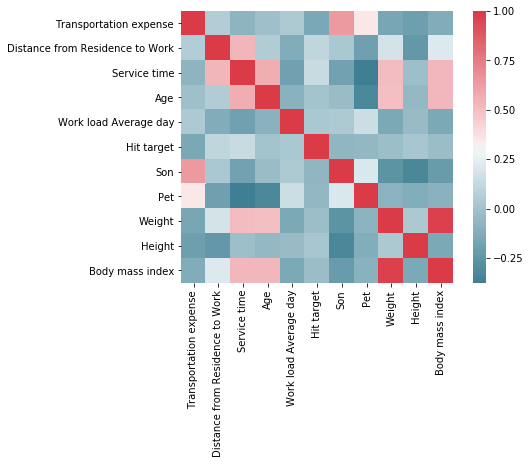

In [226]:
##Correlation analysis
#Correlation plot
df_corr = data.loc[:,cnames]
#Set the width and height of the plot
f, ax = plt.subplots(figsize=(7, 5))

#Generate correlation matrix
corr = df_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [233]:
#Chisquare test of independence
#Save categorical variables
cat_names = ['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons','Disciplinary failure', 'Education','Social drinker',
       'Social smoker']
#loop for chi square values
for i in cat_names:
    print(i)
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(data['Absenteeism time in hours'], data[i]))
    print(p)

ID
0.0
Reason for absence
0.0
Month of absence
0.0
Day of the week
0.0
Seasons
0.0
Disciplinary failure
7.979384467185031e-140
Education
0.0
Social drinker
0.0
Social smoker
0.0


In [236]:
data = data.drop(['Body mass index'], axis=1)

# Feature Scaling

(array([ 24.,   1.,   0.,  38.,   6.,  47.,   3., 101.,   4., 218.,  15.,
         84.,  22., 158.,   3.,   0.,   0.,   8.,   8.]),
 array([165.        , 165.52631579, 166.05263158, 166.57894737,
        167.10526316, 167.63157895, 168.15789474, 168.68421053,
        169.21052632, 169.73684211, 170.26315789, 170.78947368,
        171.31578947, 171.84210526, 172.36842105, 172.89473684,
        173.42105263, 173.94736842, 174.47368421, 175.        ]),
 <a list of 19 Patch objects>)

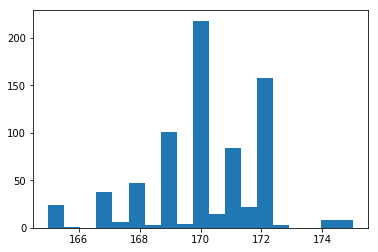

In [238]:
#Normality check
%matplotlib inline  
plt.hist(data['Height'], bins='auto')

In [249]:
cnames = ["Transportation expense", "Distance from Residence to Work", "Service time", "Age", "Work load Average day", 
          "Hit target","Son", "Pet", "Weight", "Height"]
#Nomalisation
for i in cnames:
    print(i)
    data[i] = (data[i] - data[i].min())/(data[i].max() - data[i].min())

Transportation expense
Distance from Residence to Work
Service time
Age
Work load Average day
Hit target
Son
Pet
Weight
Height


# Model Development

In [276]:
#Data Sampling
nrow= len(data.index)
train, test = train_test_split(data, test_size = 0.2)

In [277]:
train.shape

(592, 20)

In [256]:
test.shape

(148, 20)

In [278]:
#####Decision Tree Algortithm
from sklearn.tree import DecisionTreeRegressor
fit_dt= DecisionTreeRegressor(max_depth=2).fit(train.iloc[:,0:19],train.iloc[:,19])

In [279]:
fit_dt

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [280]:
predict_dt= fit_dt.predict(test.iloc[:,0:19])

In [281]:
#Calculate RMSE
def RMSE(actual, pred):
    return np.sqrt(((pred - actual) ** 2).mean())

In [282]:
RMSE(test.iloc[:,19],predict_dt)
#output = 13.009041545395686

13.009041545395686

In [283]:
######Random Forest Algorithm
from sklearn.ensemble import RandomForestRegressor

In [284]:
fit_rf = RandomForestRegressor(n_estimators = 100, random_state = 99).fit(train.iloc[:,0:19],train.iloc[:,19])

In [285]:
fit_rf

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=99, verbose=0, warm_start=False)

In [286]:
predict_rf= fit_rf.predict(test.iloc[:,0:19])

In [287]:
RMSE(test.iloc[:,19],predict_rf)
#output = 10.168282568103772

10.168282568103772

In [290]:
######Multiple Linear Regression
import statsmodels.api as sm
fit_lr = sm.OLS(train.iloc[:,19],train.iloc[:,0:19]).fit()
fit_lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Absenteeism time in hours   R-squared:                       0.323
Model:                                   OLS   Adj. R-squared:                  0.301
Method:                        Least Squares   F-statistic:                     14.41
Date:                       Sat, 01 Dec 2018   Prob (F-statistic):           1.35e-37
Time:                               15:31:34   Log-Likelihood:                -2322.4
No. Observations:                        592   AIC:                             4683.
Df Residuals:                            573   BIC:                             4766.
Df Model:                                 19                                         
Covariance Type:                   nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
ID                                  0.0785      0.083      0.943      0.346      -0.085       0.242
Reason for absence                 -0.4477      0.085     -5.252      0.000      -0.615      -0.280
Month of absence                    0.1991      0.214      0.929      0.353      -0.222       0.620
Day of the week                    -1.2039      0.427     -2.818      0.005      -2.043      -0.365
Seasons                            -0.0391      0.613     -0.064      0.949      -1.242       1.164
Transportation expense             16.3586      5.299      3.087      0.002       5.952      26.766
Distance from Residence to Work     4.9241      3.128      1.574      0.116      -1.219      11.068
Service time                        5.9909      6.024      0.994      0.320      -5.841      17.823
Age                                -2.6141      4.575     -0.571      0.568     -11.600       6.372
Work load Average day               2.3533      2.580      0.912      0.362      -2.715       7.422
Hit target                          6.4968      2.815      2.308      0.021       0.968      12.026
Disciplinary failure               -2.8090      2.818     -0.997      0.319      -8.345       2.726
Education                          -1.8369      1.312     -1.400      0.162      -4.413       0.739
Son                                 5.0552      2.837      1.782      0.075      -0.517      10.627
Social drinker                     -5.9321      3.370     -1.760      0.079     -12.551       0.686
Social smoker                      -3.2656      3.479     -0.939      0.348     -10.098       3.567
Pet                                -4.9064      2.592     -1.893      0.059      -9.997       0.185
Weight                              2.3393      3.600      0.650      0.516      -4.732       9.411
Height                             15.7909      3.642      4.336      0.000       8.638      22.944
==============================================================================
Omnibus:                      663.149   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            37562.974
Skew:                           5.371   Prob(JB):                         0.00
Kurtosis:                      40.516   Cond. No.                         414.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [291]:
predict_lr = fit_lr.predict(test.iloc[:,0:19])

In [292]:
RMSE(test.iloc[:,19],predict_lr)
#output = 13.350487470207554

13.350487470207554

In [293]:
######KNN Implementation
from sklearn import neighbors

In [296]:
rmse_val = []           #to store rmse values for different k
for K in range(30):
    K = K+1
    fit_knn = neighbors.KNeighborsRegressor(n_neighbors = K)
    
    fit_knn.fit(train.iloc[:,0:19], train.iloc[:,19]) #fit the model
    
    predict_knn = fit_knn.predict(test.iloc[:,0:19]) #make prediction on test set
    error = RMSE(test.iloc[:,19] , predict_knn) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 14.467729514952214
RMSE value for k=  2 is: 12.373157556806142
RMSE value for k=  3 is: 12.196166107130725
RMSE value for k=  4 is: 12.297380570300636
RMSE value for k=  5 is: 12.27175077950854
RMSE value for k=  6 is: 12.005646924340938
RMSE value for k=  7 is: 11.889984714788298
RMSE value for k=  8 is: 12.004480136399934
RMSE value for k=  9 is: 11.651671757253359
RMSE value for k=  10 is: 11.500224050876351
RMSE value for k=  11 is: 11.572183272154177
RMSE value for k=  12 is: 11.376831824502029
RMSE value for k=  13 is: 11.453114313673906
RMSE value for k=  14 is: 11.481691487620411
RMSE value for k=  15 is: 11.537833731155834
RMSE value for k=  16 is: 11.697754820552458
RMSE value for k=  17 is: 11.631098243210118
RMSE value for k=  18 is: 11.681205074889125
RMSE value for k=  19 is: 11.77743960565311
RMSE value for k=  20 is: 11.863789626146646
RMSE value for k=  21 is: 11.836022843600114
RMSE value for k=  22 is: 11.96278731553142
RMSE value for k=  23 

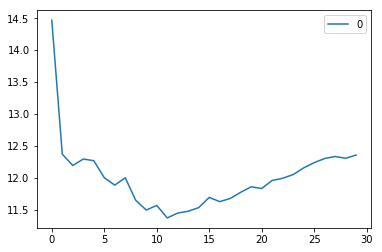

In [297]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val)  
curve.plot()
#K=12 is the value of neighbors for least RMSE.

In [298]:
#For K=12:
fit_knn = neighbors.KNeighborsRegressor(n_neighbors = 12)
fit_knn.fit(train.iloc[:,0:19], train.iloc[:,19]) #fit the model
predict_knn = fit_knn.predict(test.iloc[:,0:19]) #make prediction on test set
RMSE(test.iloc[:,19] , predict_knn) 

11.376831824502029

In [ ]:
#Thus, we find the "Random Forest Algorithm" gives us the best result with the least RMSE for this dataset.